In [1]:
#|default_exp 3c_experiments
#|hide
## Standard libraries
import os
import math
import numpy as np
import time
# Configure environment
os.environ['XLA_PYTHON_CLIENT_PREALLOCATE']='false' # Tells Jax not to hog all of the memory to this process.

## Imports for plotting
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import to_rgba
import seaborn as sns
sns.set()

## Progress bar
from tqdm.notebook import tqdm, trange

## project specifics
import diffusion_curvature
from diffusion_curvature.datasets import *
from diffusion_curvature.graphs import *
from diffusion_curvature.core import *
import jax
import jax.numpy as jnp
jax.devices()

%load_ext autoreload
%autoreload 2

# 3d Detecting Negative Curvature
> Experiments from the edge of the possible...

One puzzling fact brought to light by our "curvature colosseum" is that all methods struggle mightily to label high-dimensional datasets with any negative curvature. The Pearson correlation with the scalar curvature is robust -- but the actual values are always positive. What's up?

Here we investigate one hypothesis: *sparse sampling affects the measurement of negative curvature more strongly than positive curvature.*

To test this, we'll experiment on a 3-saddle, sampled at varying densities. We'll plot the reported curvature versus the density, then compare this to the same measurements taken on a positive region.

In [ ]:
import sympy as sp
from diffusion_curvature.random_surfaces import rejection_sample_from_surface, scalar_curvature_at_origin
def rejection_sample_from_saddle(n_samples=1000, intrinsic_dim = 2, verbose=False, intensity=1):
    d = intrinsic_dim
    vars = sp.symbols('x0:%d' % d)
    saddle = sp.Matrix([*vars])
    for i in range(d,d+1):
        saddle = saddle.row_insert(i, sp.Matrix([intensity*sum([(-1)**j * vars[j]**2 for j in range(d)])]))
    if verbose: print(saddle)
    k = scalar_curvature_at_origin(saddle)
    return rejection_sample_from_surface(saddle, n_samples), k

As a sanity check, here's the diffusion curvature of a 2-saddle.

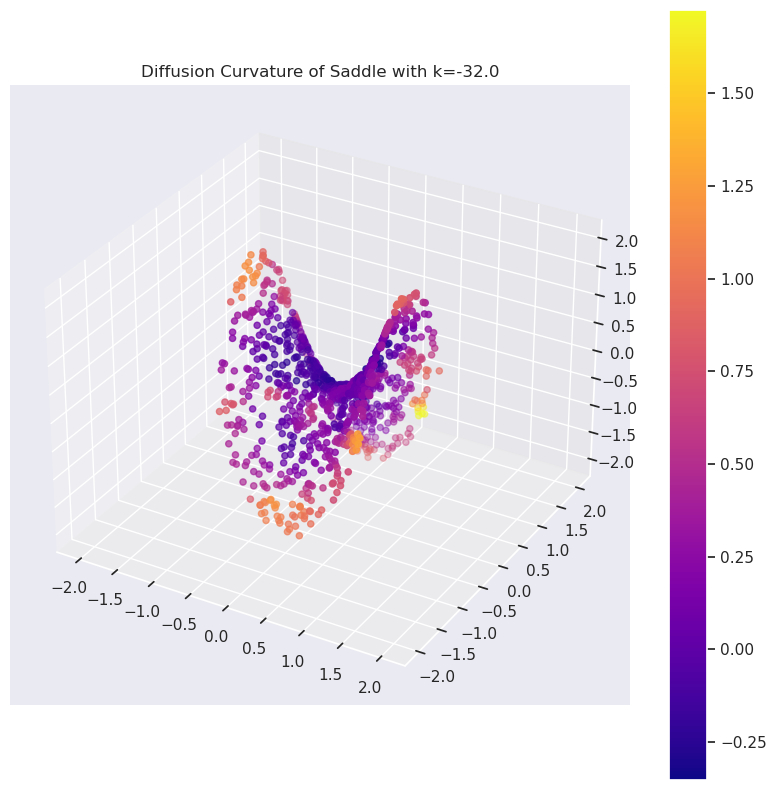

Curvature of center point =  -0.1267333


In [ ]:
X, k = rejection_sample_from_saddle(1000, 2, intensity=2)
G = graphtools.Graph(X, anisotropy=1, knn=5, decay=None).to_pygsp()
DC = DiffusionCurvature(
    laziness_method="Entropic",
    flattening_method="Mean Fixed",
    comparison_method="Subtraction",
    points_per_cluster=None, # construct separate comparison spaces around each point
    comparison_space_size_factor=1
)
ks = DC.curvature(G, t=25, dim=2, knn=5)
plot_3d(X,ks, colorbar=True, title = f"Diffusion Curvature of Saddle with {k=}")
print("Curvature of center point = ",ks[0])

In [ ]:
X, k = rejection_sample_from_saddle(1000, 7)
print(k)

-24.0


  0%|          | 0/38 [00:00<?, ?it/s]

Text(0, 0.5, 'Diffusion Curvature')

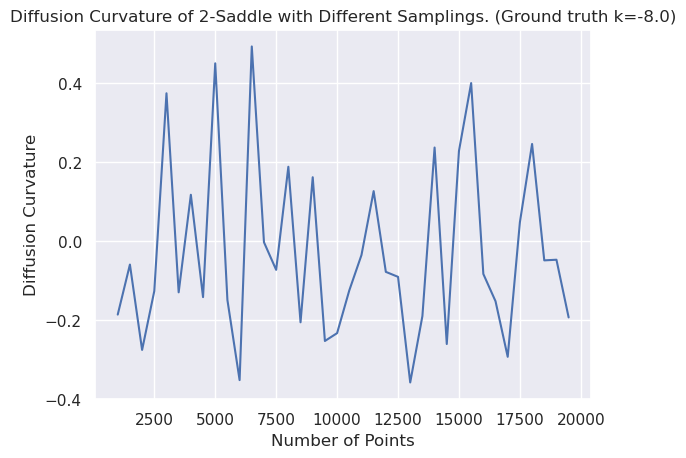

In [ ]:
import graphtools
from diffusion_curvature.core import DiffusionCurvature
ks_dc = []
dim = 2
samplings = np.arange(1000,20000,500) 
for n_points in tqdm(samplings):
    X, k = rejection_sample_from_saddle(n_points, dim)
    # Compute Diffusion Curvature
    G = graphtools.Graph(X, anisotropy=1, knn=5, decay=None).to_pygsp()
    DC = DiffusionCurvature(
        laziness_method="Entropic",
        flattening_method="Mean Fixed",
        comparison_method="Subtraction",
        points_per_cluster=None, # construct separate comparison spaces around each point
        comparison_space_size_factor=1
    )
    ks = DC.curvature(G, t=25, dim=dim, knn=5, idx=0)
    ks_dc.append(ks)
# plot the number of points versus the ks_dc
plt.plot(samplings, ks_dc)
plt.title(f"Diffusion Curvature of {dim}-Saddle with Different Samplings. (Ground truth k={k})")
plt.xlabel("Number of Points")
plt.ylabel("Diffusion Curvature")

There's a troubling amount of variance between samplings of the saddling.

  0%|          | 0/38 [00:00<?, ?it/s]

Text(0, 0.5, 'Diffusion Curvature')

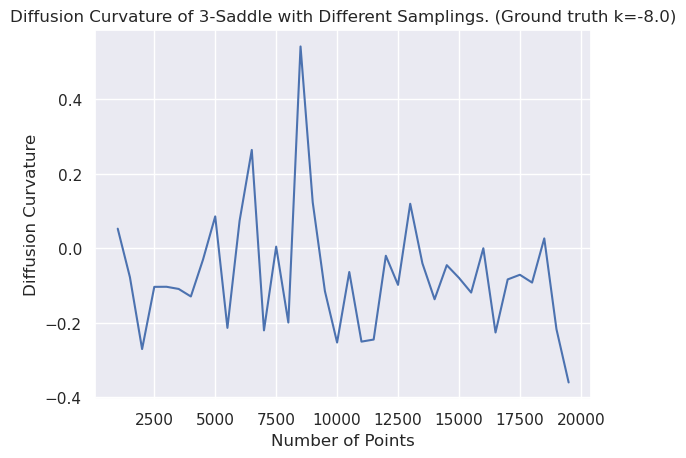

In [ ]:
import graphtools
from diffusion_curvature.core import DiffusionCurvature
ks_dc = []
dim = 3
samplings = np.arange(1000,20000,500) 
for n_points in tqdm(samplings):
    X, k = rejection_sample_from_saddle(n_points, dim)
    # Compute Diffusion Curvature
    G = graphtools.Graph(X, anisotropy=1, knn=5, decay=None).to_pygsp()
    DC = DiffusionCurvature(
        laziness_method="Entropic",
        flattening_method="Mean Fixed",
        comparison_method="Subtraction",
        points_per_cluster=None, # construct separate comparison spaces around each point
        comparison_space_size_factor=1
    )
    ks = DC.curvature(G, t=25, dim=dim, knn=5, idx=0)
    ks_dc.append(ks)
# plot the number of points versus the ks_dc
plt.plot(samplings, ks_dc)
plt.title(f"Diffusion Curvature of {dim}-Saddle with Different Samplings. (Ground truth k={k})")
plt.xlabel("Number of Points")
plt.ylabel("Diffusion Curvature")

  0%|          | 0/38 [00:00<?, ?it/s]

Text(0, 0.5, 'Diffusion Curvature')

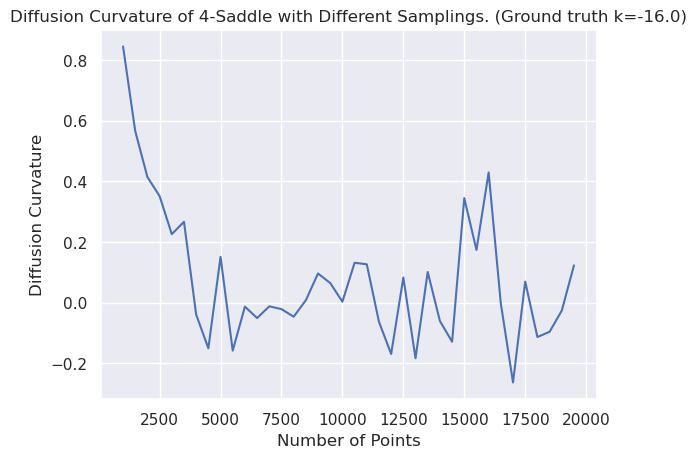

In [ ]:
import graphtools
from diffusion_curvature.core import DiffusionCurvature
ks_dc = []
dim = 4
samplings = np.arange(1000,20000,500) 
for n_points in tqdm(samplings):
    X, k = rejection_sample_from_saddle(n_points, dim)
    # Compute Diffusion Curvature
    G = graphtools.Graph(X, anisotropy=1, knn=5, decay=None).to_pygsp()
    DC = DiffusionCurvature(
        laziness_method="Entropic",
        flattening_method="Mean Fixed",
        comparison_method="Subtraction",
        points_per_cluster=None, # construct separate comparison spaces around each point
        comparison_space_size_factor=1
    )
    ks = DC.curvature(G, t=25, dim=dim, knn=5, idx=0)
    ks_dc.append(ks)
# plot the number of points versus the ks_dc
plt.plot(samplings, ks_dc)
plt.title(f"Diffusion Curvature of {dim}-Saddle with Different Samplings. (Ground truth k={k})")
plt.xlabel("Number of Points")
plt.ylabel("Diffusion Curvature")

So it *is* possible to pick up negative diffusion curvature in higher dimensions -- but it takes a *lot* of points!

# Closer Investigation of Variance between Samplings of the saddle

  0%|          | 0/100 [00:00<?, ?it/s]

(array([ 2.,  2.,  2.,  7.,  3., 10.,  7.,  5., 10.,  8.,  9.,  7.,  6.,
         8.,  3.,  3.,  2.,  3.,  1.,  2.]),
 array([-1.12866116, -1.12302792, -1.1173948 , -1.11176157, -1.10612845,
        -1.10049522, -1.09486198, -1.08922887, -1.08359563, -1.07796252,
        -1.07232928, -1.06669605, -1.06106293, -1.0554297 , -1.04979658,
        -1.04416335, -1.03853011, -1.032897  , -1.02726376, -1.02163064,
        -1.01599741]),
 <BarContainer object of 20 artists>)

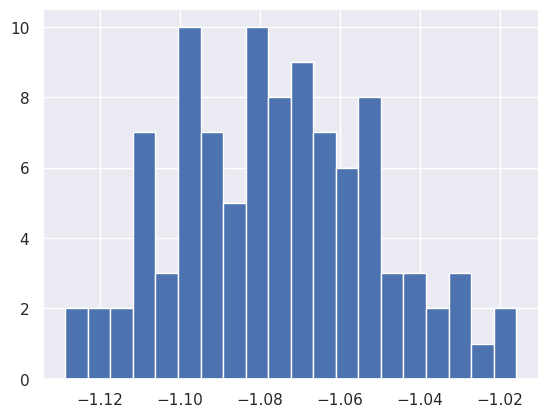

In [4]:
import graphtools
from diffusion_curvature.core import DiffusionCurvature
ks_dc = []
dim = 3
samplings = [2000]*100
Xs_sampled = []
for n_points in tqdm(samplings):
    X, k = rejection_sample_from_saddle(n_points, dim)
    Xs_sampled.append(X)
    # Compute Diffusion Curvature
    G = graphtools.Graph(X, anisotropy=1, knn=15, decay=None).to_pygsp()
    DC = DiffusionCurvature(
        laziness_method="Entropic",
        flattening_method="Mean Fixed",
        comparison_method="Subtraction",
        points_per_cluster=None, # construct separate comparison spaces around each point
        comparison_space_size_factor=1
    )
    ks = DC.curvature(G, t=25, dim=dim, knn=5, idx=0)
    ks_dc.append(ks)
# plot a histogram of the diffusion curvatures
plt.hist(ks_dc, bins=20)

# Visual Investigations of the Saddle

In [ ]:
# sort Xs_sorted by the curvatures ks_dc, from highest to lowest
Xs_sorted = [Xs_sampled[i] for i in np.argsort(ks_dc)[::-1]]

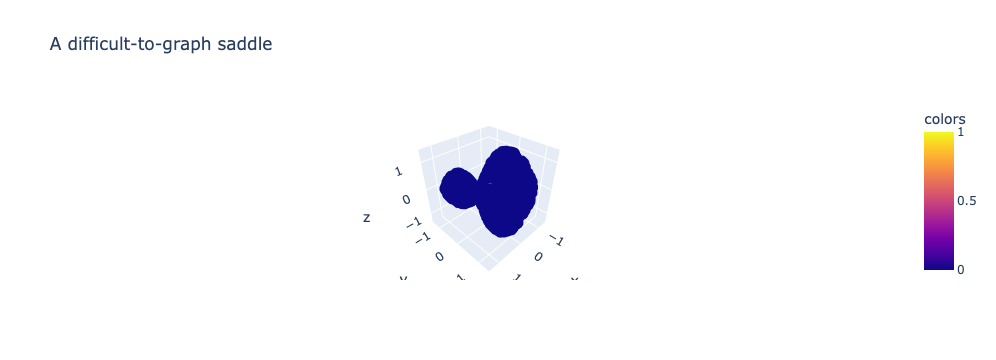

In [ ]:
from diffusion_curvature.utils import plot_3d
degenerate_X = Xs_sorted[0]
signal = np.zeros(degenerate_X.shape[0])
signal[0] = 1
plot_3d(degenerate_X, signal, title = "A difficult-to-graph saddle", use_plotly=True)

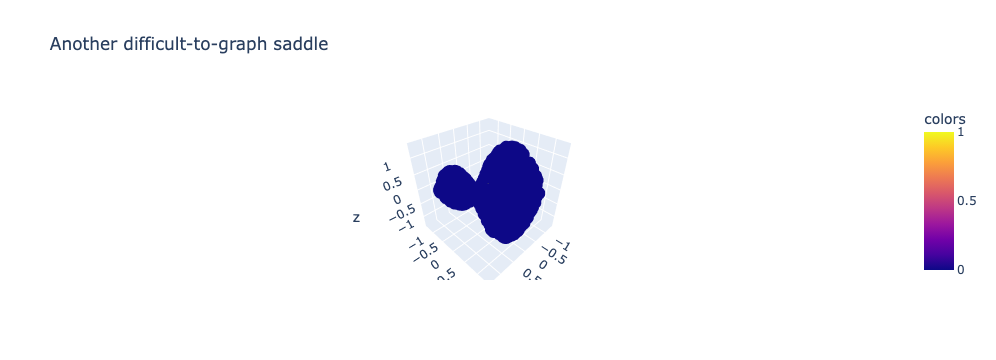

In [ ]:
from diffusion_curvature.utils import plot_3d
degenerate_X = Xs_sorted[1]
signal = np.zeros(degenerate_X.shape[0])
signal[0] = 1
plot_3d(degenerate_X, signal, title = "Another difficult-to-graph saddle", use_plotly=True)

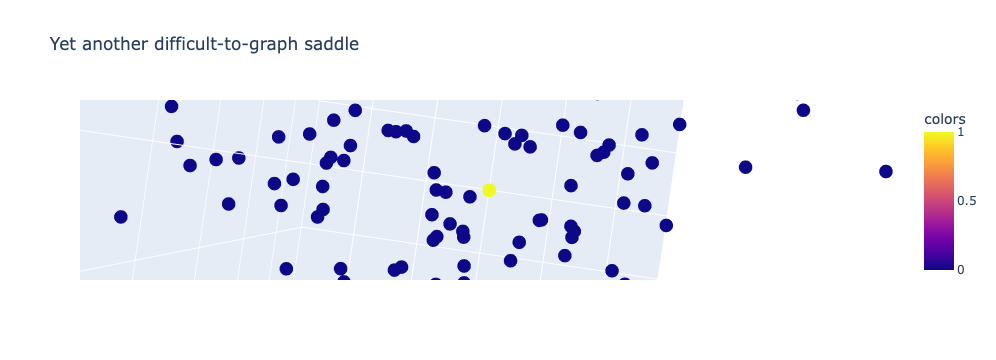

In [ ]:
from diffusion_curvature.utils import plot_3d
degenerate_X = Xs_sorted[2]
signal = np.zeros(degenerate_X.shape[0])
signal[0] = 1
plot_3d(degenerate_X, signal, title = "Yet another difficult-to-graph saddle", use_plotly=True)

These ancdata confirm a suspicion: the graphs of these mis-diagnosed saddles are deranged because they have these big holes close to the center point that give the appearance of positive curvature. Diffusion from the center point is reflected by the boundary of the hole, increasing the perceived laziness.

How to counter this? I have a few ideas.

# PHATE Denoising of the Graph

Let's try a tact suggested by E.B.: using PHATE distances to construct a new "denoised" graph, which (one hopes) has fewer spurious connections and more consistent curvature.

In [ ]:
from diffusion_curvature.distances import phate_distances_differentiable
from diffusion_curvature.vne import optimal_t_via_vne
from diffusion_curvature.utils import *
from diffusion_curvature.heat_diffusion import jax_power_matrix
def phate_denoised_graph(
    X, 
    t = None,
    knn=15,
):
    """
    Computes PHATE distances on graph, 
    then returns a new graph built with this distance matrix.
    """
    G_old = graphtools.Graph(X, anisotropy=1, knn=knn, decay=None).to_pygsp()
    P = diff_op(G_old).todense() # is sparse, by default
    P = jnp.array(P)
    if t is None: t = optimal_t_via_vne(P)
    Pt = jax_power_matrix(P,t)
    Pt_cpu = jax.device_put(Pt, jax.devices('cpu')[0])
    D = phate_distances_differentiable(Pt_cpu).numpy()
    # construct graph
    G = graphtools.Graph(D, anisotropy=1, knn=5, decay=20, precomputed="distance").to_pygsp()
    return G



In [ ]:
X, k = rejection_sample_from_saddle(3000, 2)
G = phate_denoised_graph(X,t=25)

In [ ]:
import graphtools
from diffusion_curvature.core import DiffusionCurvature
ks_dc = []
dim = 2
samplings = np.arange(1000,20000,500) 
for n_points in tqdm(samplings):
    X, k = rejection_sample_from_saddle(n_points, dim)
    # Compute Diffusion Curvature
    G = phate_denoised_graph(X,t=25)
    DC = DiffusionCurvature(
        laziness_method="Entropic",
        flattening_method="Mean Fixed",
        comparison_method="Subtraction",
        points_per_cluster=None, # construct separate comparison spaces around each point
        comparison_space_size_factor=1
    )
    ks = DC.curvature(G, t=25, dim=dim, knn=5, idx=0)
    ks_dc.append(ks)
# plot the number of points versus the ks_dc
plt.plot(samplings, ks_dc)
plt.title(f"Diffusion Curvature of {dim}-Saddle with Different Samplings. (Ground truth k={k})")
plt.xlabel("Number of Points")
plt.ylabel("Diffusion Curvature")

  0%|          | 0/38 [00:00<?, ?it/s]